In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import glob

In [2]:
unfolded_and_calc_EC50s_file_name = './NTF2_unfolded_and_calc_EC50s_high_conf.tab'
unfolded_and_calc_EC50s_handle = open(unfolded_and_calc_EC50s_file_name,'r')
unfolded_and_calc_EC50s_lines = [ i[:-1] for i in unfolded_and_calc_EC50s_handle.readlines() ]
unfolded_and_calc_EC50s_dict = { line.split()[0]:line.split()[1:] for line in unfolded_and_calc_EC50s_lines }
des_names = unfolded_and_calc_EC50s_dict.keys()
print('Reliable data: %d'%(len(unfolded_and_calc_EC50s_dict.keys())))
print('Reliable data for designs: %d'%(len([ i for i in unfolded_and_calc_EC50s_dict.keys() if 'sc' not in i])))

Reliable data: 6072
Reliable data for designs: 4369


In [3]:
scrambles_tryp_unfolded_ec50 = [ float(unfolded_and_calc_EC50s_dict[des][-2]) for des in des_names if 'sc' in des ]
scrambles_chymo_unfolded_ec50 = [ float(unfolded_and_calc_EC50s_dict[des][-1]) for des in des_names if 'sc' in des ]
scrambles_tryp_calc_ec50 = [ float(unfolded_and_calc_EC50s_dict[des][0]) for des in des_names if 'sc' in des ]
scrambles_chymo_calc_ec50 = [ float(unfolded_and_calc_EC50s_dict[des][1]) for des in des_names if 'sc' in des ]

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


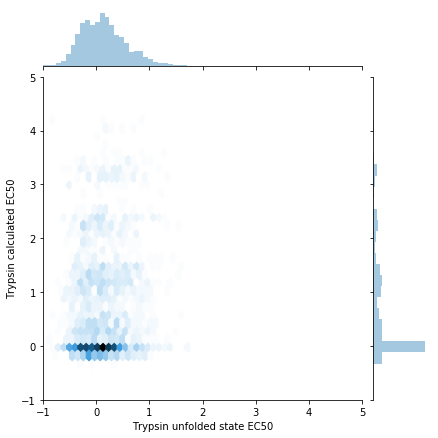

In [4]:
fig1 = sns.jointplot(np.array(scrambles_tryp_unfolded_ec50),np.array(scrambles_tryp_calc_ec50),kind="hex",xlim=(-1,5),ylim=(-1,5) )
fig1.set_axis_labels("Trypsin unfolded state EC50", "Trypsin calculated EC50")

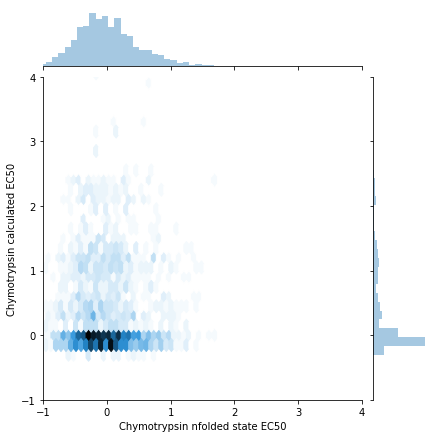

In [5]:
fig2 = sns.jointplot(np.array(scrambles_chymo_unfolded_ec50),np.array(scrambles_chymo_calc_ec50),kind='hex',xlim=(-1,4),ylim=(-1,4) )
fig2.set_axis_labels("Chymotrypsin nfolded state EC50", "Chymotrypsin calculated EC50")

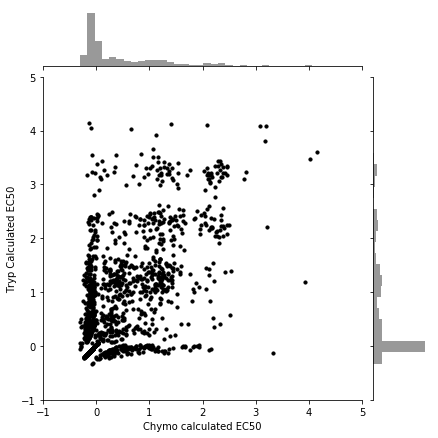

In [6]:
fig3 = sns.jointplot(np.array(scrambles_chymo_calc_ec50),np.array(scrambles_tryp_calc_ec50),s=10,color='k',xlim=(-1,5),ylim=(-1,5) )
fig3.set_axis_labels("Chymo calculated EC50", "Tryp Calculated EC50")

In [7]:
des_tryp_unfolded_ec50 = [ float(unfolded_and_calc_EC50s_dict[des][-2]) for des in des_names if 'sc' not in des ]
des_chymo_unfolded_ec50 = [ float(unfolded_and_calc_EC50s_dict[des][-1]) for des in des_names if 'sc' not in des ]
des_tryp_calc_ec50 = [ float(unfolded_and_calc_EC50s_dict[des][0]) for des in des_names if 'sc' not in des ]
des_chymo_calc_ec50 = [ float(unfolded_and_calc_EC50s_dict[des][1]) for des in des_names if 'sc' not in des ]

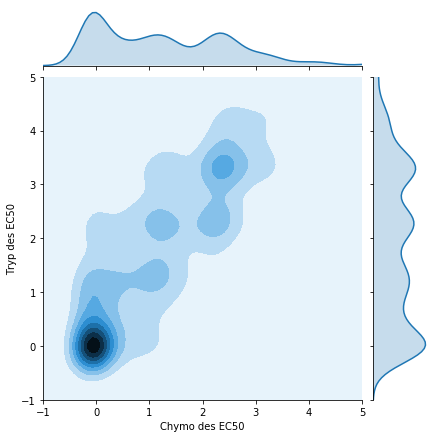

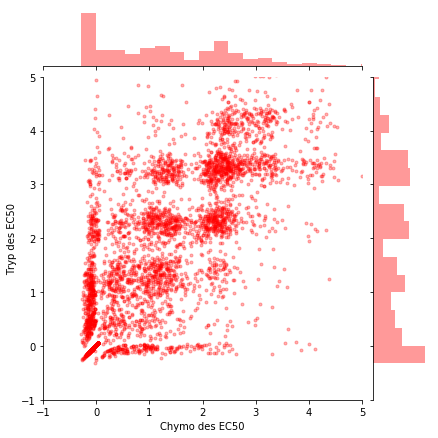

In [8]:
fig4 = sns.jointplot(np.array(des_chymo_calc_ec50),np.array(des_tryp_calc_ec50),kind='kde',xlim=(-1,5),ylim=(-1,5) )
fig5 = sns.jointplot(np.array(des_chymo_calc_ec50),np.array(des_tryp_calc_ec50),alpha=0.3,marker='.', color='red',xlim=(-1,5),ylim=(-1,5) )
fig4.set_axis_labels("Chymo des EC50", "Tryp des EC50")
fig5.set_axis_labels("Chymo des EC50", "Tryp des EC50")

In [9]:
tryp_des_stability_scores = [ float(unfolded_and_calc_EC50s_dict[des][0])-float(unfolded_and_calc_EC50s_dict[des][8]) for des in des_names if 'sc' not in des ]
chymo_des_stability_scores = [ float(unfolded_and_calc_EC50s_dict[des][1])-float(unfolded_and_calc_EC50s_dict[des][9]) for des in des_names if 'sc' not in des ]

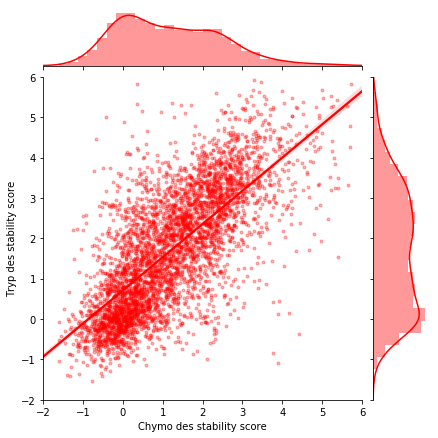

In [10]:
fig6 = sns.jointplot(np.array(chymo_des_stability_scores),np.array(tryp_des_stability_scores),kind='reg',marker='.', scatter_kws={'alpha':0.3}, color='red',xlim=(-2,6),ylim=(-2,6) )
#fig6 = sns.regplot(np.array(chymo_des_stability_scores),np.array(tryp_des_stability_scores),marker='.', color='red' )
fig6.set_axis_labels("Chymo des stability score", "Tryp des stability score")

In [11]:
'''
Here, consolidated are stability scores are calculated with lowest
EC50s: min(des_ec50(tryp_EC50),des_ec50(chymo_EC50))
'''
consolidated_stability_scores_min = { des:0 for des in des_names}
for des in des_names:
    #if 'sc' in des: continue
    tryp_EC50 = float(unfolded_and_calc_EC50s_dict[des][0])
    chymo_EC50 = float(unfolded_and_calc_EC50s_dict[des][1])
    tryp_EC50_stab_score = float(unfolded_and_calc_EC50s_dict[des][0]) - float(unfolded_and_calc_EC50s_dict[des][8])
    chymo_EC50_stab_score = float(unfolded_and_calc_EC50s_dict[des][1]) - float(unfolded_and_calc_EC50s_dict[des][9])
    if tryp_EC50_stab_score < chymo_EC50_stab_score:
        consolidated_stability_scores_min[des] = np.log10(3**tryp_EC50_stab_score)
    else:
        consolidated_stability_scores_min[des] = np.log10(3**chymo_EC50_stab_score)

In [12]:
all_stability_scores_dict_min = {des:consolidated_stability_scores_min[des] for des in des_names}
all_stability_scores_min = [all_stability_scores_dict_min[des] for des in des_names ]
des_stability_scores_dict_min = {des:consolidated_stability_scores_min[des] for des in des_names if 'sc' not in des}
des_stability_scores_min = [des_stability_scores_dict_min[des] for des in des_names if 'sc' not in des ]
sc_stability_scores_dict_min = {des:consolidated_stability_scores_min[des] for des in des_names if 'sc' in des}
sc_stability_scores_min = [sc_stability_scores_dict_min[des] for des in des_names if 'sc' in des ]

des_mon_stability_scores_min = [des_stability_scores_dict_min[des] for des in des_names if ('sc' not in des) and ('d' not in des) ]
sc_mon_stability_scores_min = [sc_stability_scores_dict_min[des] for des in des_names if ('sc' in des) and ('d' not in des) ]

des_dim_stability_scores_min = [des_stability_scores_dict_min[des] for des in des_names if ('sc' not in des) and ('d' in des) ]
sc_dim_stability_scores_min = [sc_stability_scores_dict_min[des] for des in des_names if ('sc' in des) and ('d' in des) ]


In [13]:
#log_10_des_stability_scores_min = [np.log10(3**i) for i in des_stability_scores_min ]
#log_10_all_stability_scores_min = [np.log10(3**i) for i in all_stability_scores_min ]
#log_10_sc_stability_scores_min = [np.log10(3**i) for i in sc_stability_scores_min ]


stab_scores_DF = pd.DataFrame.from_dict( { des:{'stability_sc':all_stability_scores_dict_min[des]} for des in all_stability_scores_dict_min.keys() },orient='index' )
stab_scores_DF.to_csv('all_des_stability_scores.csv')

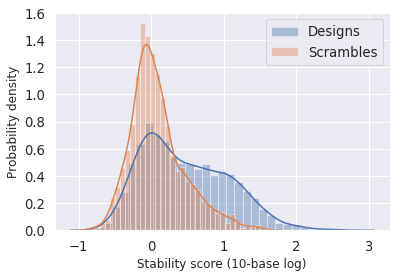

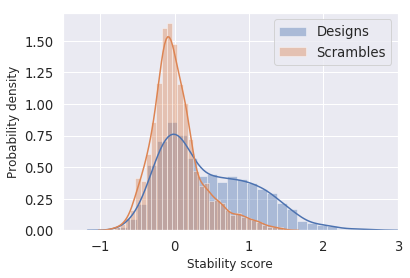

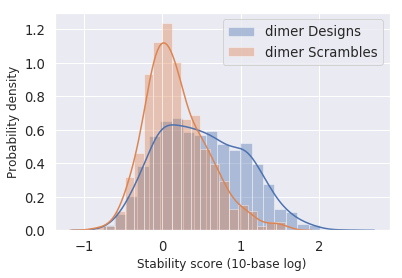

In [14]:
sns.set(font_scale=1.2)
figX = sns.distplot(des_stability_scores_min,label="Designs")
sns.distplot(sc_stability_scores_min,ax=figX,label="Scrambles")
figX.set_ylabel('Probability density', fontsize=12)
figX.set_xlabel('Stability score (10-base log)', fontsize=12)
plt.legend()
plt.show()
# Monomers
figY = sns.distplot(des_mon_stability_scores_min,label="Designs")
sns.distplot(sc_mon_stability_scores_min,ax=figY,label="Scrambles")
figY.set_ylabel('Probability density', fontsize=12)
figY.set_xlabel('Stability score', fontsize=12)
plt.xlim(-1.5,3)
plt.legend()
plt.show()
figZ = sns.distplot(des_dim_stability_scores_min,label="dimer Designs")
sns.distplot(sc_dim_stability_scores_min,ax=figZ,label="dimer Scrambles")
figZ.set_ylabel('Probability density', fontsize=12)
figZ.set_xlabel('Stability score (10-base log)', fontsize=12)
plt.legend()
plt.show()

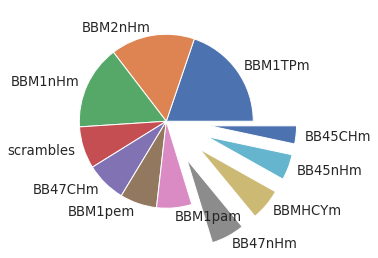

In [15]:
# Looking at composition of designs with stability score > 1.0:

stable_things = { des:all_stability_scores_dict_min[des] for des in all_stability_scores_dict_min.keys() if all_stability_scores_dict_min[des] > 1.0}
#des_types_BB = set([ i[:-4] for i in stable_things.keys() if 'BB' in i])
des_types_BB = set([ i[:-4] for i in stable_things.keys() if ('BB' in i) and (i[-5]=='m') ])
des_types_ppl = set([ 'TCdes', 'BTNNTF2', 'HCYbbCtl', 'JK', 'MBA', 'sc057TCdes']) # This only works with stability = 1!!
#des_types = list(des_types_BB) + list(des_types_ppl)
scrambles = {'scrambles':len([ i for i in stable_things.keys() if 'sc' in i])}
designs = { typ:len([ key for key in stable_things.keys() if (typ in key) and ( 'sc' not in key ) ]) for typ in des_types_BB if 'sc' not in typ}
designs.update(scrambles)
names = designs.keys()
counts = sorted([ (name,designs[name]) for name in names],key=lambda x:x[1],reverse=True)
explode = tuple(0 if n<(len(counts)-4) else 0.5 for n,i in enumerate(counts))

pie_plot = plt.pie( [ count[1] for count in counts] , labels=[count[0] for count in counts], explode=explode,labeldistance=1.1,)
